# Evaluación 1: Repaso de estadística descriptiva e inferencial

En esta evaluación vamos a trabajar con los datos de la medición del nivel nutricional en mujeres según la Encuesta Demográfica y de Salud Familiar 2017 (ENDES 2017).

## Parte 1

A continuación se presenta una base de datos que muestra los niveles de hemoglobina en la sangre de mujeres. Además, se brinda información sobre si las mujeres están embarazadas o no. A partir de la información presente en esta base de datos, responde:
> La variable `Embarazada` codifica como 1 si las encuestadas estaban embarazadas y como 0 en caso contrario.

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/Evaluaciones/HemoglobinayEmbarazo.csv"
)
df = df[df.Nivel_de_hemoglobina != "#NULL!"]
df.drop(columns=["HHID", "HA54"], inplace=True)
df = df.astype(float)
df.head()

,Nivel_de_hemoglobina,Embarazada
0,13.8,0.0
1,13.6,1.0
2,13.1,0.0
3,10.4,0.0
4,13.7,0.0


1. Calcula estadísticos descriptivos del nivel de hemoglobina en la sangre de las encuestadas después de agrupar según la variable `Embarazada` (2 pts). 
> Sugerencia: Utiliza el método .groupby() antes de calcular los descriptivos.

In [2]:
df.groupby("Embarazada").describe()

Nivel_de_hemoglobina                                              \
                          count       mean       std  min   25%   50%   75%   
Embarazada                                                                    
0.0                     32834.0  12.854498  1.300518  4.3  12.2  12.9  13.7   
1.0                      1262.0  11.560539  1.320657  6.4  10.7  11.6  12.4   

                  
             max  
Embarazada        
0.0         20.8  
1.0         15.7

2. Crea un violinplot que permita comparar los niveles de hemoglobina en la sangre de las encuestadas después de agrupar según la variable `Embarazada`. ¿Qué puedes comentar en relación a ambas distribuciones? Considera su forma y su tendencia central. (2 pts)

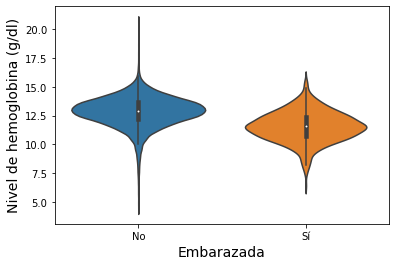

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x="Embarazada", y="Nivel_de_hemoglobina", data=df)
plt.xlabel("Embarazada", size=14)
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("Nivel de hemoglobina (g/dl)", size=14);

Las distribuciones son aproximadamente simétricas. Destaca que en el grupo de las no embarazadas, existen colas largas especialmente hacia los niveles bajos de hemoglobina. A nivel descriptivo, la mediana del nivel de hemoglobina de las embarazadas está por debajo de la mediana de las no embarazadas.   

3. Asumiendo que ambas distribuciones son simétricas, utiliza una prueba inferencial para comparar el nivel de hemoglobina en la sangre de las encuestadas según su condición de embarazo. ¿Qué puedes concluir? (2 pts).

In [4]:
from scipy.stats import ttest_ind

grupo1 = df.query("Embarazada == 0")["Nivel_de_hemoglobina"]
grupo2 = df.query("Embarazada == 1")["Nivel_de_hemoglobina"]

ttest_ind(grupo1, grupo2, equal_var=False)

Ttest_indResult(statistic=34.175419485790506, pvalue=3.463017195435654e-185)

Existen diferencias significativas en el nivel de hemoglobina de las encuestadas según su condición de embarazo. El grupo de embarazadas presenta niveles más bajos de hemoglobina que el grupo de no embarazadas.  

## PARTE 2

Continuamos trabajando con los datos de la misma encuesta. Para esta sección, vamos a considerar la edad de las mujeres para nuestros reportes.

In [5]:
!pip install pyreadstat
df_2 = pd.read_spss("HemoglobinaEmbarazoyEdad.sav")
df_2.drop(columns=["HHID"], inplace=True)
mapping = {"Sí": 1, "No o no sabe": 0}
df_2 = df_2.replace({"HA54": mapping})
df_2.groupby("HA54").describe()
df_2 = df_2.rename(columns={"HA54": "Embarazada"})
df_2.head()

,Embarazada,Nivel_de_hemoglobina,Edad
0,0.0,13.8,39.0
1,1.0,13.6,22.0
2,0.0,13.1,19.0
3,0.0,10.4,33.0
4,0.0,13.7,33.0


1. Nuevamente, reporta estadísticos descriptivos agrupando por la variable `Embaradaza`. ¿Qué puedes comentar en relación a la variable `Edad`? (2 pts)

In [6]:
df_2.groupby("Embarazada").describe()

Nivel_de_hemoglobina                                              \
                          count       mean       std  min   25%   50%   75%   
Embarazada                                                                    
0.0                     32834.0  12.854498  1.300518  4.3  12.2  12.9  13.7   
1.0                      1262.0  11.560539  1.320657  6.4  10.7  11.6  12.4   

                     Edad                                                     
             max    count       mean       std   min   25%   50%   75%   max  
Embarazada                                                                    
0.0         20.8  32835.0  30.427958  9.306043  15.0  23.0  30.0  38.0  49.0  
1.0         15.7   1262.0  26.965135  6.638416  15.0  22.0  27.0  32.0  45.0

A nivel descriptivo, el grupo de no embarazadas presenta un promedio de edad menor al grupo de embarazadas. Además, puede apreciarse una mayor dispersión en la edad del grupo de no embarazadas. Por último, la cantidad de mujeres en cada grupo difiere considerablemente. 

2. Crea una visualización que permita comparar ambos grupos en función a su intervalo de confianza al 95%. Asumiendo que las distribuciones son simétricas, ¿es razonable pensar que no existe una diferencia significativa entre ambos grupos? Justifica tu respuesta (2 pts).

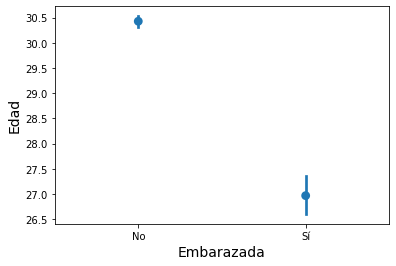

In [12]:
sns.pointplot(x="Embarazada", y="Edad", data=df_2, ci=95, join=False)
plt.xlabel("Embarazada", size=14)
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("Edad", size=14);

No es razonable pensar que no habrá diferencias significativas entre los grupos. Esto debido a que los intervalos de confianza calculados no se superponen entre sí, lo cual indica que a largo plazo el 95% de las veces los promedios de edad de ambos grupos serán diferentes entre sí. 

3. Emplea una prueba inferencial para comparar ambos grupos. Adicionalmente, calcula el tamaño del efecto para esta comparación. ¿Qué puedes concluir? (2 pts)

In [8]:
import researchpy

g1 = df_2.query("Embarazada == 0")["Edad"]
g2 = df_2.query("Embarazada == 1")["Edad"]

des, res = researchpy.ttest(g1, g2, paired=False, equal_variances=False)
des

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Edad,32835.0,30.427958,9.306043,0.051357,30.327297,30.528619
1,Edad,1262.0,26.965135,6.638416,0.186868,26.598528,27.331741
2,combined,34097.0,30.299792,9.244146,0.050062,30.201668,30.397915


In [9]:
res

,Welch's t-test,results
0,Difference (Edad - Edad) =,3.4628
1,Degrees of freedom =,1458.6753
2,t =,17.8683
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.3755
7,Hedge's g =,0.3755
8,Glass's delta =,0.3721
9,Pearson's r =,0.4238


La prueba inferencial nos permite concluir que existen diferencias significativas entre ambos grupos. Sin embargo, la D de Cohen nos indica que la magnitud de esta diferencia es pequeña. 